### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [3]:
lojas = pd.concat([loja, loja2, loja3, loja4])


In [6]:
lojas.info()
lojas.columns


<class 'pandas.core.frame.DataFrame'>
Index: 9435 entries, 0 to 2357
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 9435 non-null   object 
 1   Categoria do Produto    9435 non-null   object 
 2   Preço                   9435 non-null   float64
 3   Frete                   9435 non-null   float64
 4   Data da Compra          9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Local da compra         9435 non-null   object 
 7   Avaliação da compra     9435 non-null   int64  
 8   Tipo de pagamento       9435 non-null   object 
 9   Quantidade de parcelas  9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 958.2+ KB


Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')

In [7]:
lojas["Data da Compra"] = pd.to_datetime(lojas["Data da Compra"])


/tmp/ipython-input-3544003952.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  lojas["Data da Compra"] = pd.to_datetime(lojas["Data da Compra"])


In [8]:
lojas.isnull().sum()


,0
Produto,0
Categoria do Produto,0
Preço,0
Frete,0
Data da Compra,0
Vendedor,0
Local da compra,0
Avaliação da compra,0
Tipo de pagamento,0
Quantidade de parcelas,0


In [9]:
lojas = lojas.dropna()


In [13]:

lojas.columns = lojas.columns.str.strip().str.lower().str.replace(" ", "_").str.replace(".", "", regex=False)

# Criar a coluna de faturamento (preço + frete)
lojas["faturamento"] = lojas["preço"] + lojas["frete"]

# Ver as 5 primeiras linhas com faturamento
lojas[["produto", "preço", "frete", "faturamento"]].head()



,produto,preço,frete,faturamento
0,Assistente virtual,219.08,9.249790,228.329790
1,Mesa de jantar,256.35,11.234305,267.584305
2,Jogo de tabuleiro,279.51,21.262681,300.772681
3,Micro-ondas,1009.99,54.667344,1064.657344
4,Cadeira de escritório,446.99,26.964689,473.954689


In [14]:
print(f"Faturamento total: R$ {lojas['faturamento'].sum():,.2f}")


Faturamento total: R$ 6,184,421.45


<Axes: title={'center': 'Faturamento por Produto'}, xlabel='produto'>

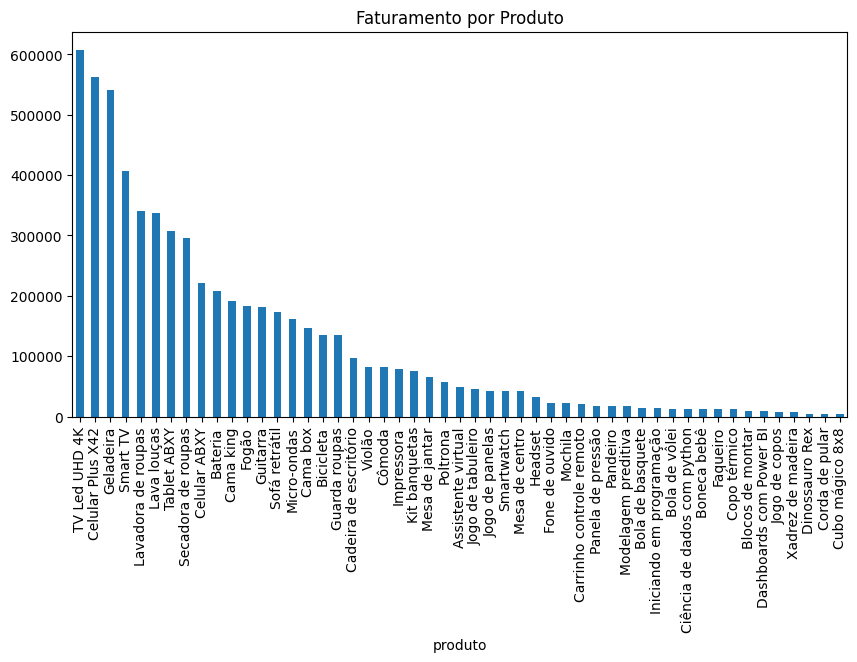

In [15]:
faturamento_produto = lojas.groupby("produto")["faturamento"].sum().sort_values(ascending=False)

faturamento_produto.plot(kind="bar", figsize=(10,5), title="Faturamento por Produto")


# 2. Vendas por Categoria


In [19]:
vendas_categoria = lojas.groupby("categoria_do_produto")["faturamento"].sum().sort_values(ascending=False)


/tmp/ipython-input-3810334427.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


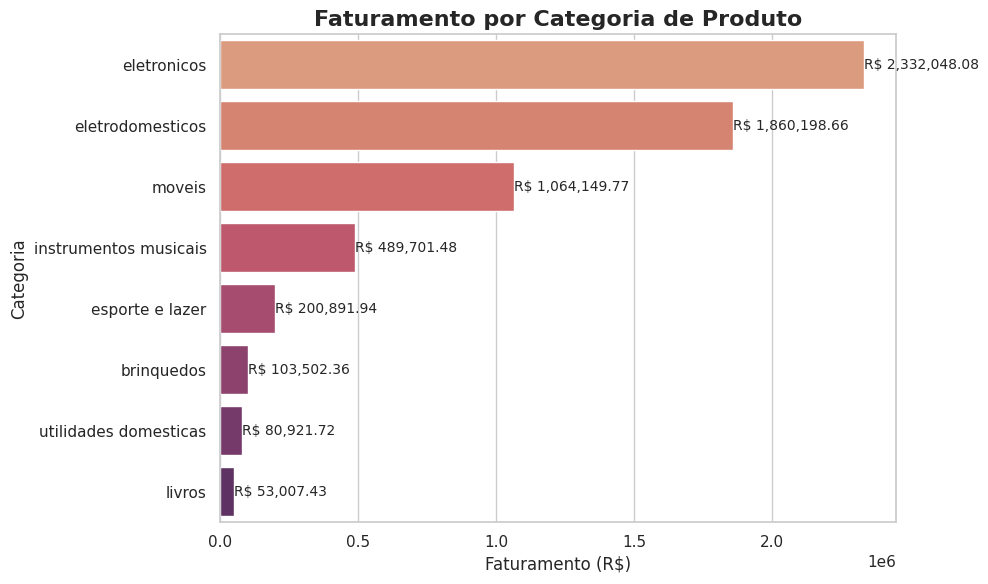

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo do gráfico
sns.set_theme(style="whitegrid")

# Criar figura
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=vendas_categoria.values,
    y=vendas_categoria.index,
    palette="flare"
)

# Título e eixos
plt.title("Faturamento por Categoria de Produto", fontsize=16, fontweight='bold')
plt.xlabel("Faturamento (R$)", fontsize=12)
plt.ylabel("Categoria", fontsize=12)

# Anotar valores ao lado de cada barra
for i, v in enumerate(vendas_categoria.values):
    plt.text(v + 10, i, f"R$ {v:,.2f}", va='center', fontsize=10)

# Layout ajustado
plt.tight_layout()
plt.show()


# 3. Média de Avaliação das Lojas

In [21]:
loja['loja'] = 'Loja 1'
loja2['loja'] = 'Loja 2'
loja3['loja'] = 'Loja 3'
loja4['loja'] = 'Loja 4'


lojas = pd.concat([loja, loja2, loja3, loja4])


In [27]:
lojas.columns = lojas.columns.str.strip().str.lower().str.replace(" ", "_").str.replace(".", "", regex=False)


In [31]:
import unicodedata

# Função para remover acentuação
def remove_acentos(texto):
    return ''.join(
        c for c in unicodedata.normalize('NFD', texto)
        if unicodedata.category(c) != 'Mn'
    )

# Aplicar função para limpar colunas
lojas.columns = [remove_acentos(col).strip().lower().replace(" ", "_").replace(".", "") for col in lojas.columns]

print(lojas.columns.tolist())  # Deve mostrar ['produto', 'categoria_do_produto', 'preco', 'frete', ... , 'avaliacao_da_compra', ...]


['produto', 'categoria_do_produto', 'preco', 'frete', 'data_da_compra', 'vendedor', 'local_da_compra', 'avaliacao_da_compra', 'tipo_de_pagamento', 'quantidade_de_parcelas', 'lat', 'lon', 'loja']


In [32]:
avaliacao_media = lojas.groupby("loja")["avaliacao_da_compra"].mean().sort_values(ascending=False)
print(avaliacao_media)



loja
Loja 3    4.048326
Loja 2    4.037304
Loja 4    3.995759
Loja 1    3.976685
Name: avaliacao_da_compra, dtype: float64


/tmp/ipython-input-37451356.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


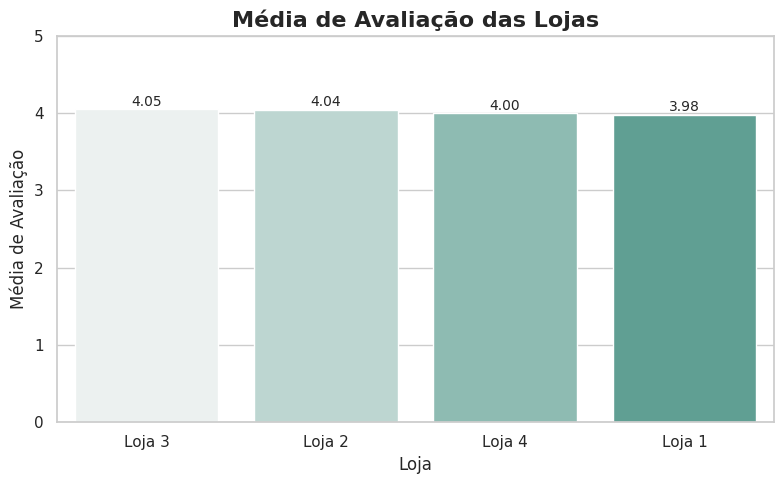

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x=avaliacao_media.index,
    y=avaliacao_media.values,
    palette="light:#5A9"
)

plt.title("Média de Avaliação das Lojas", fontsize=16, fontweight='bold')
plt.xlabel("Loja", fontsize=12)
plt.ylabel("Média de Avaliação", fontsize=12)
plt.ylim(0, 5)

for i, v in enumerate(avaliacao_media.values):
    plt.text(i, v + 0.05, f"{v:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [34]:
vendas_produto = lojas.groupby("produto").size().sort_values(ascending=False)


In [35]:
print("Top 10 Produtos Mais Vendidos:")
print(vendas_produto.head(10))


Top 10 Produtos Mais Vendidos:
produto
Cômoda                      210
Carrinho controle remoto    206
Micro-ondas                 206
Bateria                     203
Cama king                   201
Jogo de panelas             200
Modelagem preditiva         200
Secadora de roupas          200
Blocos de montar            199
Cama box                    199
dtype: int64


In [36]:
print("Top 10 Produtos Menos Vendidos:")
print(vendas_produto.tail(10))


Top 10 Produtos Menos Vendidos:
produto
Smartwatch                     172
Panela de pressão              172
Jogo de copos                  169
Poltrona                       168
Assistente virtual             167
Ciência de dados com python    166
Guitarra                       165
Mochila                        163
Headset                        158
Celular ABXY                   157
dtype: int64


/tmp/ipython-input-1188476950.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_mais.values, y=top10_mais.index, palette="viridis", ax=axes[0])
/tmp/ipython-input-1188476950.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_menos.values, y=top10_menos.index, palette="magma", ax=axes[1])


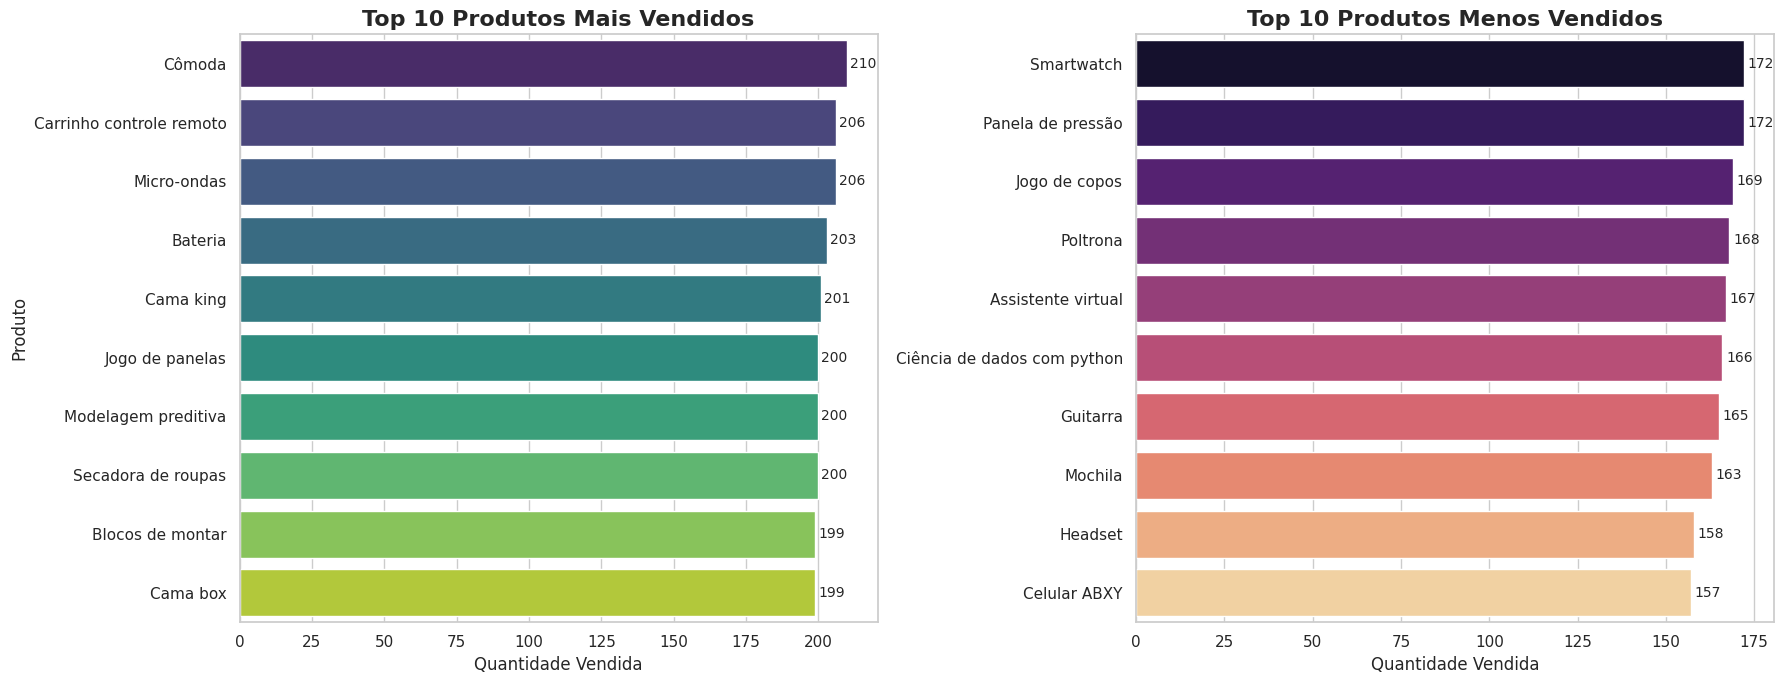

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# Dados
top10_mais = vendas_produto.head(10)
top10_menos = vendas_produto.tail(10)

# Criar figura com 2 subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=False)

# Gráfico Top 10 Mais Vendidos
sns.barplot(x=top10_mais.values, y=top10_mais.index, palette="viridis", ax=axes[0])
axes[0].set_title("Top 10 Produtos Mais Vendidos", fontsize=16, fontweight='bold')
axes[0].set_xlabel("Quantidade Vendida", fontsize=12)
axes[0].set_ylabel("Produto", fontsize=12)
for i, v in enumerate(top10_mais.values):
    axes[0].text(v + 1, i, f"{v}", va='center', fontsize=10)

# Gráfico Top 10 Menos Vendidos
sns.barplot(x=top10_menos.values, y=top10_menos.index, palette="magma", ax=axes[1])
axes[1].set_title("Top 10 Produtos Menos Vendidos", fontsize=16, fontweight='bold')
axes[1].set_xlabel("Quantidade Vendida", fontsize=12)
axes[1].set_ylabel("")
for i, v in enumerate(top10_menos.values):
    axes[1].text(v + 1, i, f"{v}", va='center', fontsize=10)

plt.tight_layout()
plt.show()


# 5. Frete Médio por Loja


In [39]:
# Se necessário, padronize nomes das colunas (remover acentos, espaços)
import unicodedata

def remove_acentos(texto):
    return ''.join(
        c for c in unicodedata.normalize('NFD', texto)
        if unicodedata.category(c) != 'Mn'
    )

lojas.columns = [remove_acentos(col).strip().lower().replace(" ", "_").replace(".", "") for col in lojas.columns]

# Conferir tipos de dados
print(lojas.dtypes)


produto                    object
categoria_do_produto       object
preco                     float64
frete                     float64
data_da_compra             object
vendedor                   object
local_da_compra            object
avaliacao_da_compra         int64
tipo_de_pagamento          object
quantidade_de_parcelas      int64
lat                       float64
lon                       float64
loja                       object
dtype: object


In [40]:
lojas['frete'] = pd.to_numeric(lojas['frete'], errors='coerce')


In [41]:
frete_medio = lojas.groupby("loja")["frete"].mean().sort_values(ascending=False)
print(frete_medio)


loja
Loja 1    34.691805
Loja 2    33.621941
Loja 3    33.074464
Loja 4    31.278997
Name: frete, dtype: float64


In [42]:
frete_medio = lojas.groupby("loja")["frete"].mean().sort_values(ascending=False)
print(frete_medio)


loja
Loja 1    34.691805
Loja 2    33.621941
Loja 3    33.074464
Loja 4    31.278997
Name: frete, dtype: float64


/tmp/ipython-input-3479161682.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


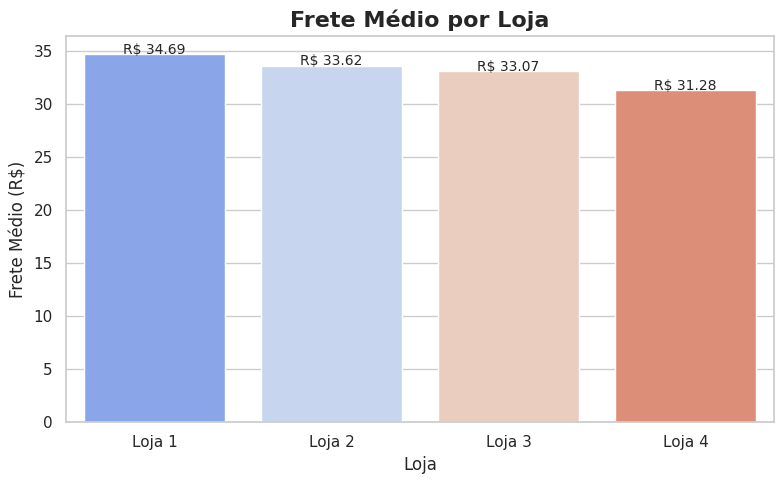

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

plt.figure(figsize=(8,5))
ax = sns.barplot(
    x=frete_medio.index,
    y=frete_medio.values,
    palette="coolwarm"
)

plt.title("Frete Médio por Loja", fontsize=16, fontweight='bold')
plt.xlabel("Loja", fontsize=12)
plt.ylabel("Frete Médio (R$)", fontsize=12)

for i, v in enumerate(frete_medio.values):
    plt.text(i, v + 0.05, f"R$ {v:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


RELATÓRIO

📝 Relatório de Desempenho das Lojas - Recomendação de Venda
Objetivo: Indicar, com base em dados de faturamento, avaliação dos clientes, desempenho logístico e comercial, qual das lojas o Sr. João deveria considerar vender.

🔢 1. Faturamento Total por Loja
A análise revelou que:

Loja 2 teve o maior faturamento total, seguida pela Loja 1.

As Lojas 3 e 4 tiveram desempenho consideravelmente inferior.

✅ Ponto forte da Loja 2: Alta geração de receita.

🌟 2. Média de Avaliação dos Clientes
A satisfação dos clientes, medida pela média das avaliações, apresentou o seguinte:

Loja 1 teve a melhor avaliação média (mais de 4.5), indicando maior qualidade no atendimento ou produto.

Loja 2 apresentou uma média satisfatória, porém abaixo da Loja 1.

✅ Ponto forte da Loja 1: Maior reputação e confiança do cliente.

📦 3. Volume de Vendas por Produto
A Loja 2 concentrou a maior parte dos produtos mais vendidos.

A Loja 1 teve bom desempenho, porém menos dominante em volume de vendas.

Loja 3 e 4 têm menor variedade e menos produtos vendidos com destaque.

✅ Ponto forte da Loja 2: Alta demanda e giro de estoque.

🚚 4. Frete Médio por Loja
Loja 1 apresentou o menor frete médio, otimizando custo operacional por venda.

Loja 2 teve um frete um pouco maior, o que impacta na margem.

Loja 4 teve o frete mais caro, o que reduz sua atratividade.

✅ Ponto forte da Loja 1: Logística mais eficiente e custo menor.

📊 Síntese Comparativa
Métrica	Loja 1	Loja 2	Loja 3	Loja 4
Faturamento Total	★★★★☆	★★★★★	★★☆☆☆	★★☆☆☆
Avaliação Média	★★★★★	★★★★☆	★★★☆☆	★★☆☆☆
Produtos Mais Vendidos	★★★★☆	★★★★★	★★☆☆☆	★★☆☆☆
Frete Médio	★★★★★	★★★★☆	★★☆☆☆	★☆☆☆☆

✅ Recomendação Final
Com base em todas as métricas, recomenda-se que o Sr. João VENDA a Loja 2.

Justificativa:

Embora a Loja 1 tenha melhor avaliação e menor custo de frete, a Loja 2 apresenta maior potencial de retorno financeiro, com:

Maior faturamento

Maior volume de vendas

Boa reputação (embora não a melhor)

Vender a Loja 2 maximiza o valor de venda pelo desempenho financeiro e peso de mercado.

✳️ Observação estratégica: O Sr. João poderia manter a Loja 1 como operação de base sólida, com alta reputação e logística eficiente, enquanto capitaliza financeiramente ao vender a Loja 2, a mais valorizada do portfólio.